<a href="https://colab.research.google.com/github/ReynaldiJ/portfolio/blob/main/Supervised_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_raw = pd.read_excel('/dataset_CS.xlsx')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15561 entries, 0 to 15560
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Score A  12366 non-null  float64
 1   Score B  15556 non-null  float64
 2   Score C  15560 non-null  float64
 3   Score D  15553 non-null  float64
 4   Score E  15558 non-null  float64
 5   Score F  15556 non-null  float64
 6   Score G  15559 non-null  float64
 7   Score H  15561 non-null  float64
 8   Target   15561 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.1 MB


In [ ]:
df_raw.describe()

,Score A,Score B,Score C,Score D,Score E,Score F,Score G,Score H,Target
count,12366.000000,15556.000000,15560.000000,15553.000000,15558.000000,15556.000000,15559.000000,15561.000000,15561.000000
mean,27.754024,16.247416,4.055961,131.138042,132.485270,37.199013,-0.613462,-2.726702,0.103142
std,62.100420,11.976220,2.242664,134.120258,31.772967,5.598701,1.344886,9.131227,0.304155
min,0.426421,4.422259,-1.569635,-2.570068,6.975000,19.820000,-9.683426,-95.342270,0.000000
25%,3.985368,8.758720,2.755954,41.045580,120.424219,33.800000,-0.581983,-1.368536,0.000000
50%,5.862040,11.254962,4.159329,104.328648,137.859375,37.550000,-0.270615,-0.286482,0.000000
75%,12.648829,17.829047,5.280978,176.216340,152.325000,40.850000,-0.033906,0.265324,0.000000
max,446.784281,66.385326,17.269922,1548.301088,231.140625,79.020000,2.251213,2.508640,1.000000


In [ ]:
df_raw.head()

,Score A,Score B,Score C,Score D,Score E,Score F,Score G,Score H,Target
0,4.608696,9.710194,4.890220,149.499199,130.350000,42.20,-0.544268,-0.097624,0
1,2.162207,8.089256,7.128041,281.887087,136.743750,39.38,-0.281668,-0.405709,0
2,5.647157,9.742913,4.103872,111.192359,170.362500,40.38,-0.293969,0.479731,0
3,3.110368,7.688123,6.657170,279.257016,163.800000,39.95,-0.053548,0.524036,0
4,8.081940,13.901477,3.503341,69.568206,100.415625,29.10,-0.687038,-3.730455,0


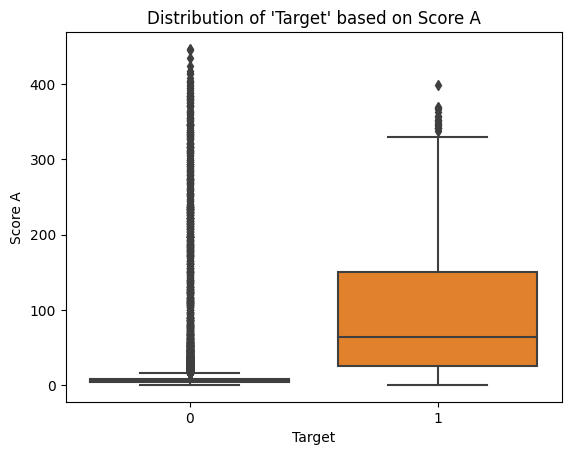

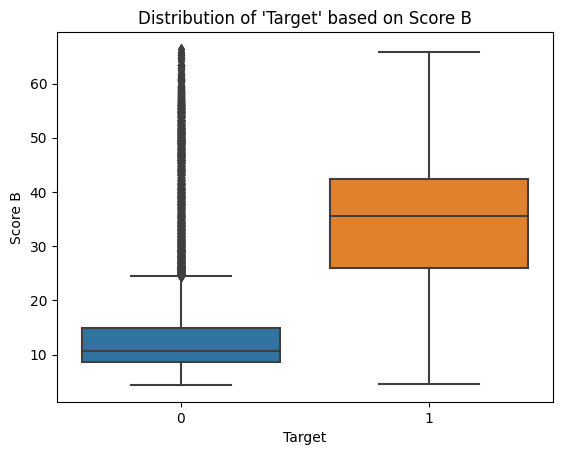

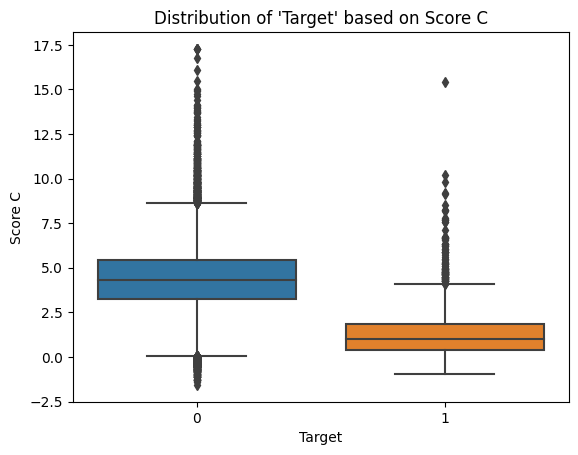

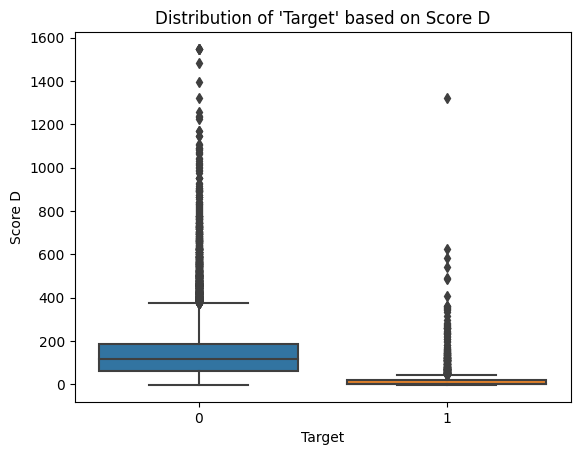

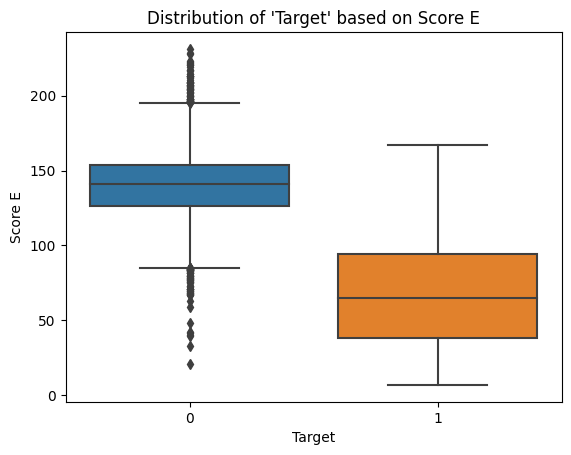

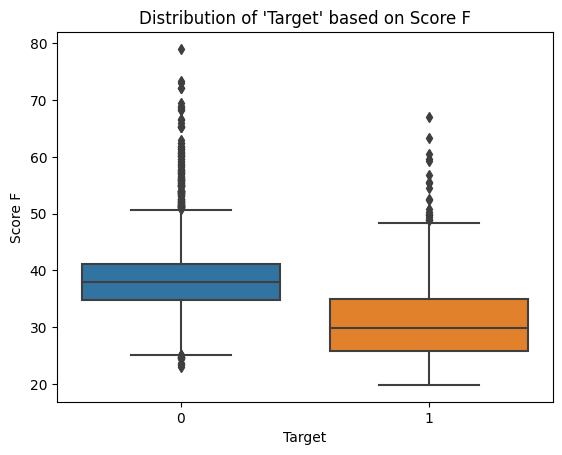

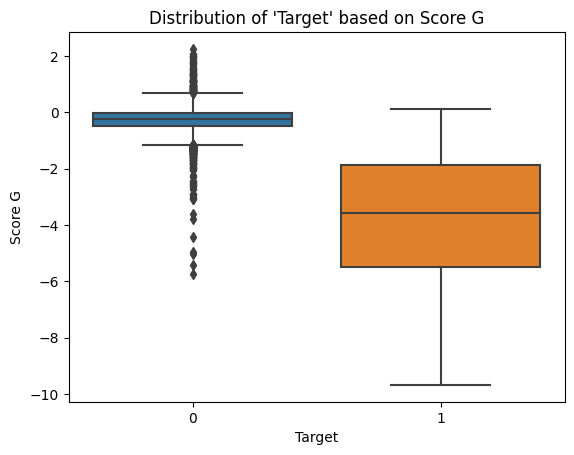

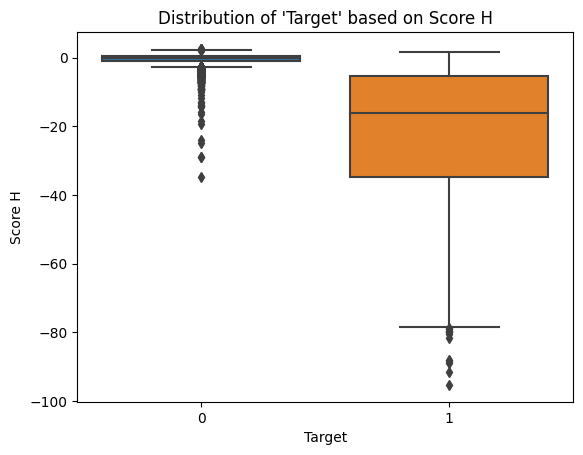

<Figure size 640x480 with 0 Axes>

In [ ]:
cols = ['Score A', 'Score B', 'Score C', 'Score D', 'Score E', 'Score F', 'Score G', 'Score H']

for col in (cols):
  sns.boxplot(x = df_raw['Target'], y = df_raw[col]).set(title = "Distribution of 'Target' based on " + col)
  plt.figure()

In [ ]:
df_raw.isnull().sum()

Score A    3195
Score B       5
Score C       1
Score D       8
Score E       3
Score F       5
Score G       2
Score H       0
Target        0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

df_clean = df_raw.copy()
df_var_clean = df_clean[['Score B', 'Score C', 'Score D', 'Score E', 'Score F', 'Score G', 'Score H']
].dropna()
df_clean1 = df_clean[['Score A', 'Score B', 'Score C', 'Score D', 'Score E', 'Score F', 'Score G', 'Score H']
].dropna()

df_var = df_clean1.drop(['Score A'], axis = 1)
df_target = df_clean1[['Score A']]

linmod = LinearRegression()
linmod.fit(df_var, df_target)
df_impute = pd.DataFrame(linmod.predict(df_var_clean))
df_impute.rename({0 : 'Score A'}, axis = 1, inplace = True)
df_impute

,Score A
0,-0.600695
1,-24.629559
2,-1.841181
3,-14.262325
4,12.957272
...,...
15532,16.961062
15533,0.987552
15534,28.780870
15535,23.755968


In [ ]:
df_clean.fillna(df_impute, inplace = True)
df_clean.isna().sum()

Score A    24
Score B     5
Score C     1
Score D     8
Score E     3
Score F     5
Score G     2
Score H     0
Target      0
dtype: int64

In [ ]:
df_clean2 = df_clean.dropna()
df_clean2.isna().sum()

Score A    0
Score B    0
Score C    0
Score D    0
Score E    0
Score F    0
Score G    0
Score H    0
Target     0
dtype: int64

In [ ]:
df_final = df_clean2.copy()

In [ ]:
#split data
from sklearn.model_selection import train_test_split as tts

df_feature = df_final.drop('Target', axis = 1)
df_target = df_final['Target']
x_train, x_test, y_train, y_test = tts(df_feature,
                                       df_target,
                                       test_size = 0.3,
                                       random_state = 99)

#check data
print("x_train : ", len(x_train))
print("x_test : ", len(x_test))
print("y_train : ", len(y_train))
print("y_test : ", len(y_test))

x_train :  10859
x_test :  4654
y_train :  10859
y_test :  4654


In [ ]:
#train model
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [ ]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict(x_test)
SVC_matrix = confusion_matrix(y_test, prediction)
SVC_report = classification_report(y_test, prediction)
print(SVC_matrix)
print()
print(SVC_report)

[[4183   23]
 [ 109  339]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4206
           1       0.94      0.76      0.84       448

    accuracy                           0.97      4654
   macro avg       0.96      0.88      0.91      4654
weighted avg       0.97      0.97      0.97      4654



In [ ]:
#hyperparameter tunning (grid search)

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1, 1, 10, 100],
             'gamma':[0.01, 0.1, 1, 10],
             'kernel':['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=1)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

grid_prediction = grid.predict(x_test)
print(confusion_matrix(y_test, grid_prediction))
print()
print(classification_report(y_test, grid_prediction))

[[4180   26]
 [  86  362]]

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4206
           1       0.93      0.81      0.87       448

    accuracy                           0.98      4654
   macro avg       0.96      0.90      0.93      4654
weighted avg       0.98      0.98      0.98      4654



In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
predict = clf.predict(x_train)
report = classification_report(y_train, predict)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      9704
           1       0.72      0.86      0.78      1155

    accuracy                           0.95     10859
   macro avg       0.85      0.91      0.88     10859
weighted avg       0.95      0.95      0.95     10859



In [ ]:
predict = clf.predict(x_test)
NB_report = classification_report(y_test, predict)
print(NB_report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4206
           1       0.68      0.83      0.75       448

    accuracy                           0.95      4654
   macro avg       0.83      0.89      0.86      4654
weighted avg       0.95      0.95      0.95      4654



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth = 2, random_state = 0)
random_forest.fit(x_train, y_train)
predict = random_forest.predict(x_train)
report = classification_report(y_train, predict)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9704
           1       0.95      0.81      0.87      1155

    accuracy                           0.98     10859
   macro avg       0.96      0.90      0.93     10859
weighted avg       0.97      0.98      0.97     10859



In [ ]:
predict = random_forest.predict(x_test)
rf_report = classification_report(y_test, predict)
print(rf_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4206
           1       0.95      0.78      0.85       448

    accuracy                           0.97      4654
   macro avg       0.96      0.89      0.92      4654
weighted avg       0.97      0.97      0.97      4654



<Axes: >

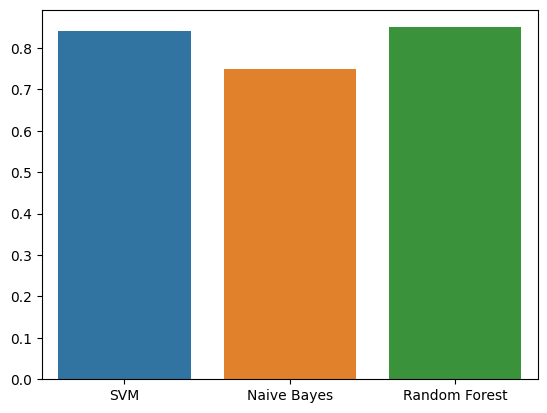

In [ ]:
f1_values = [float(i.split()[12]) for i in [SVC_report,
                                            NB_report,
                                            rf_report]]

sns.barplot(x = ['SVM', 'Naive Bayes', 'Random Forest'], y = f1_values)